<a href="https://colab.research.google.com/github/Saroramath/MachineLearning/blob/main/6205A/6205A3Cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Learning Goals 


1. Understand the TF.Dataset and Input pipelines commands for better efficiancy.
2. Use Numpy arrays to model and integrate different metrics to be evaluated at the model fit.


In [88]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# TF.Dataset

In [89]:
(ds_train, ds_val, ds_test), ds_info = tfds.load(
    'cifar10',
    split=['train[:90%]', 'train[90%:100%]', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [90]:
ds_info

tfds.core.DatasetInfo(
    name='cifar10',
    version=3.0.2,
    description='The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.',
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    features=FeaturesDict({
        'id': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(32, 32, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=60000,
    splits={
        'test': 10000,
        'train': 50000,
    },
    supervised_keys=('image', 'label'),
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learning multiple layers of features from tiny images},
        institution = {},
        year = {2009}
    }""",
    redistribution_info=,
)

## Explore the data

### View the Data

,image,label
0,,8 (ship)
1,,4 (deer)
2,,7 (horse)
3,,4 (deer)

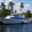
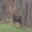
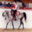
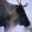

In [91]:
tfds.as_dataframe(ds_train.take(4), ds_info) #method 1

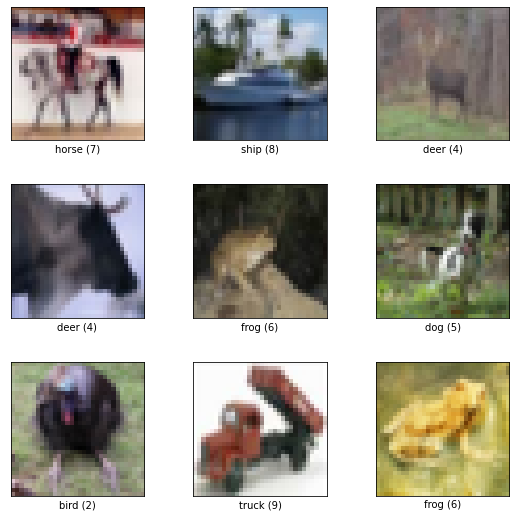

In [92]:
fig = tfds.show_examples(ds_train, ds_info) #method 2

### Dataset

The data is loaded as a tuple of TFDatasets, train and test, each containing n number of tuples of tensors, representing images with (32, 32, 3) tensor and label with scaler ()

In [93]:
ds_train 

<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>

In [94]:
 for image,label in ds_train.take(1):     #This is a way to access the image and label in ds_train. They are of shape
  print(label)

tf.Tensor(7, shape=(), dtype=int64)


In [95]:
for img, lbl in ds_train.take(1): #This is not a tensor of shape containg the number of elements
  print(img)

tf.Tensor(
[[[143  96  70]
  [141  96  72]
  [135  93  72]
  ...
  [ 96  37  19]
  [105  42  18]
  [104  38  20]]

 [[128  98  92]
  [146 118 112]
  [170 145 138]
  ...
  [108  45  26]
  [112  44  24]
  [112  41  22]]

 [[ 93  69  75]
  [118  96 101]
  [179 160 162]
  ...
  [128  68  47]
  [125  61  42]
  [122  59  39]]

 ...

 [[187 150 123]
  [184 148 123]
  [179 142 121]
  ...
  [198 163 132]
  [201 166 135]
  [207 174 143]]

 [[187 150 117]
  [181 143 115]
  [175 136 113]
  ...
  [201 164 132]
  [205 168 135]
  [207 171 139]]

 [[195 161 126]
  [187 153 123]
  [186 151 128]
  ...
  [212 177 147]
  [219 185 155]
  [221 187 157]]], shape=(32, 32, 3), dtype=uint8)


In [96]:
ds_train.cardinality() # Number of examples

<tf.Tensor: shape=(), dtype=int64, numpy=45000>

In [97]:
ds_val.cardinality()

<tf.Tensor: shape=(), dtype=int64, numpy=5000>

### Input Pipilines

In [98]:
def normalize_img(imag, label):
  return tf.cast(imag, tf.float32) / 255., label 

In [99]:
ds_train = ds_train.map(       
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [100]:
ds_train = ds_train.cache() #Cache the whole data in a the memory. Should be run over all data to be finalised. Returns a dataset
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples) # Shuffle the data in the dtaset, set buffer_size to be equal to the number of elements of type dataset. Returns a Dataset.
ds_train = ds_train.batch(128) #Batches the examples in the Dataset to form new tensors each having an external dimension represnting the batch_size. The last tensor might have a different batch size if b_s does not divide total examples.
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE) #You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

In [101]:
for img, lbl in ds_train.take(1):
  print(img.shape)

(128, 32, 32, 3)


In [102]:
ds_val = ds_val.map(       
    normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)

In [103]:
ds_val = ds_val.cache() #Cache the whole data in a the memory. Should be run over all data to be finalised. Returns a dataset
ds_val = ds_val.shuffle(ds_info.splits['train'].num_examples) # Shuffle the data in the dtaset, set buffer_size to be equal to the number of elements of tyhe dataset. Returns a Dataset.
ds_val = ds_val.batch(128) #Batches the examples in the Dataset to form new tensors each having an external dimension represnting the batch_size. The last tensor might have a different batch size if b_s does not divide total examples.
ds_val = ds_val.prefetch(tf.data.experimental.AUTOTUNE) #You could either manually tune this value, or set it to tf.data.AUTOTUNE, which will prompt the tf.data runtime to tune the value dynamically at runtime.

In [104]:
ds_test = ds_test.map(
    normalize_img,num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.cache()   #Here caching is done before the batching. and no shuffle
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

## Basic Model

In [105]:
# Step 3: Create the model Arguments:
#    shape: A shape tuple (integers), not including the batch size.
  #      For instance, shape=(32,) indicates that the expected input
 #       will be batches of 32-dimensional vectors. Elements of this tuple
  #      can be None; 'None' elements represent dimensions where the shape is
  #      not known.
  #  batch_size: optional static batch size (integer).
model = tf.keras.models.Sequential([
 # tf.keras.Input(shape=(32,32,3)), not necessary as not a layer, instead of this pass input shape in first layer
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy', #Change to Categorical_crossentropy for multiple output data
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy','mse'],
)

# Summary of the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [106]:
# Step 4: Train the model
hist = model.fit(
    ds_train,
    epochs=25,
    validation_data=ds_val,
)

Epoch 1/25
352/352 [==============================] - 5s 14ms/step - loss: 2.1610 - accuracy: 0.2518 - mse: 27.3594 - val_loss: 1.7834 - val_accuracy: 0.3762 - val_mse: 28.8140
Epoch 2/25
352/352 [==============================] - 4s 10ms/step - loss: 1.8124 - accuracy: 0.3562 - mse: 27.2807 - val_loss: 1.7559 - val_accuracy: 0.3660 - val_mse: 28.8153
Epoch 3/25
352/352 [==============================] - 4s 10ms/step - loss: 1.7250 - accuracy: 0.3896 - mse: 27.3881 - val_loss: 1.6702 - val_accuracy: 0.4058 - val_mse: 28.8184
Epoch 4/25
352/352 [==============================] - 4s 10ms/step - loss: 1.6703 - accuracy: 0.4099 - mse: 27.5263 - val_loss: 1.6379 - val_accuracy: 0.4288 - val_mse: 28.8199
Epoch 5/25
352/352 [==============================] - 3s 10ms/step - loss: 1.6329 - accuracy: 0.4246 - mse: 27.3901 - val_loss: 1.6126 - val_accuracy: 0.4344 - val_mse: 28.8195
Epoch 6/25
352/352 [==============================] - 4s 10ms/step - loss: 1.6047 - accuracy: 0.4327 - mse: 27.4414

The accuracy on training data is similar to that on validation data.

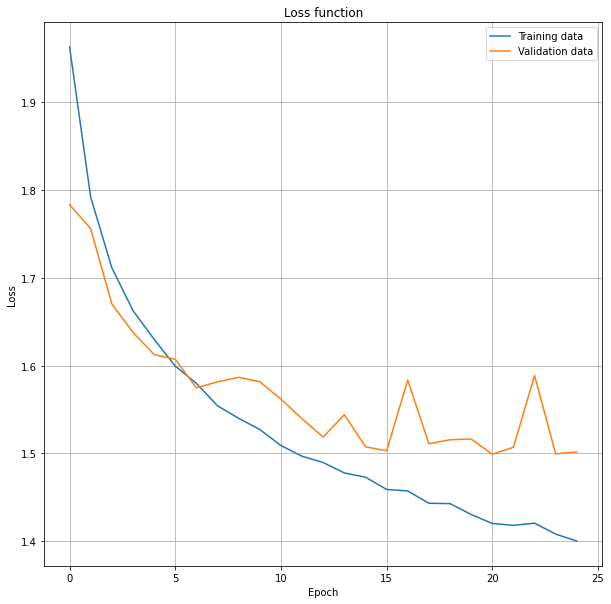

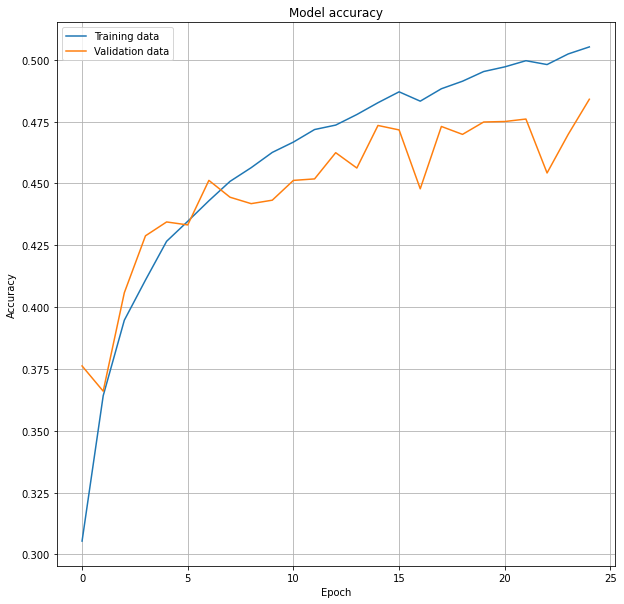

In [107]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [108]:
model.evaluate(ds_test)

79/79 [==============================] - 4s 45ms/step - loss: 1.5121 - accuracy: 0.4728 - mse: 27.6361


[1.512087345123291, 0.47279998660087585, 27.63613510131836]

## Prediction

In [109]:
ds_prediction= model.predict_classes(ds_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [110]:
ds_prediction

array([3, 1, 6, ..., 0, 6, 3])

In [111]:
x = list(ds_test)


In [112]:
len(x)

79

In [113]:
y_lbl = np.array(x)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [114]:
y_lbl.shape

(79, 2)

We observe that in TFDataset it is a bit inconvenient to work with afterwards, as it has type prefetch Dataset and to convert it back to array to work further with true labels can be a bit difficult here. We will work with arrays to start with in next section.

## More Models

### Add more layers

In [115]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy', 'mse'],
)

# Summary of the model
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_13 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_52 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [116]:
# Here we are using TFdataset as an input of model.fit. The dataset has tuple of tensors, the image, label respectively. We can also input a tensor with shape (50000,32,32)

In [117]:
hist = model.fit(
    ds_train,
    epochs=25,
    validation_data=ds_val, 
)

Epoch 1/25
352/352 [==============================] - 5s 12ms/step - loss: 2.0075 - accuracy: 0.2627 - mse: 27.4159 - val_loss: 1.7284 - val_accuracy: 0.3808 - val_mse: 28.8163
Epoch 2/25
352/352 [==============================] - 4s 12ms/step - loss: 1.7071 - accuracy: 0.3892 - mse: 27.4639 - val_loss: 1.6638 - val_accuracy: 0.4040 - val_mse: 28.8204
Epoch 3/25
352/352 [==============================] - 4s 12ms/step - loss: 1.6319 - accuracy: 0.4146 - mse: 27.4521 - val_loss: 1.5972 - val_accuracy: 0.4272 - val_mse: 28.8234
Epoch 4/25
352/352 [==============================] - 4s 12ms/step - loss: 1.5772 - accuracy: 0.4352 - mse: 27.1603 - val_loss: 1.5405 - val_accuracy: 0.4500 - val_mse: 28.8253
Epoch 5/25
352/352 [==============================] - 4s 12ms/step - loss: 1.5208 - accuracy: 0.4565 - mse: 27.4656 - val_loss: 1.5240 - val_accuracy: 0.4502 - val_mse: 28.8249
Epoch 6/25
352/352 [==============================] - 4s 12ms/step - loss: 1.4759 - accuracy: 0.4691 - mse: 27.5355

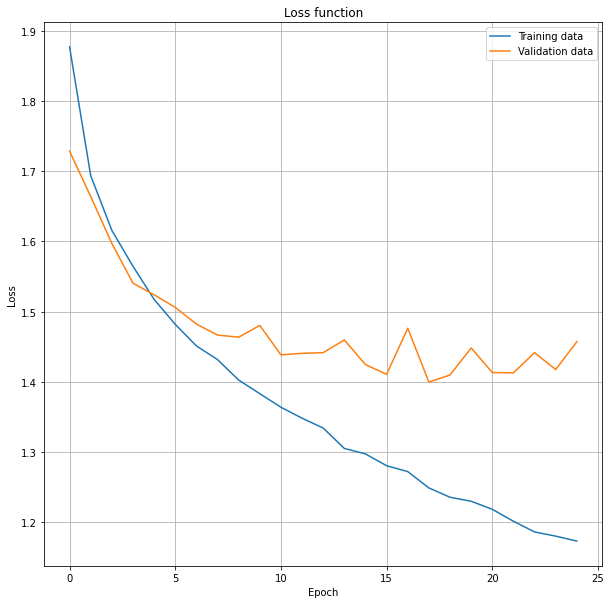

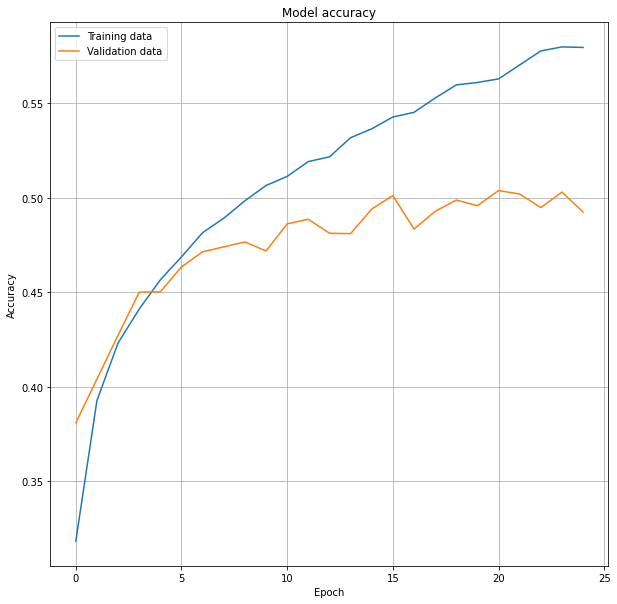

In [118]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [119]:
model.evaluate(ds_test, verbose=2)



79/79 - 0s - loss: 1.4496 - accuracy: 0.4962 - mse: 27.6449


[1.4495646953582764, 0.49619999527931213, 27.644882202148438]

## Stopping using callback

In [120]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy'],
)

# Summary of the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_55 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_56 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_57 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [121]:
hist = model.fit(
    ds_train,
    epochs=40,
    validation_data=ds_val,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) #Here we are using ds_test as the validation and testing the performance on test dat throuh that. If we use teh validation data, we will calculate the test score on test data seperately.
)

Epoch 1/40
352/352 [==============================] - 5s 12ms/step - loss: 1.9883 - accuracy: 0.2694 - val_loss: 1.7171 - val_accuracy: 0.3790
Epoch 2/40
352/352 [==============================] - 4s 12ms/step - loss: 1.7182 - accuracy: 0.3797 - val_loss: 1.6175 - val_accuracy: 0.4186
Epoch 3/40
352/352 [==============================] - 4s 12ms/step - loss: 1.6217 - accuracy: 0.4181 - val_loss: 1.5633 - val_accuracy: 0.4394
Epoch 4/40
352/352 [==============================] - 4s 11ms/step - loss: 1.5569 - accuracy: 0.4426 - val_loss: 1.5367 - val_accuracy: 0.4486
Epoch 5/40
352/352 [==============================] - 4s 12ms/step - loss: 1.5175 - accuracy: 0.4538 - val_loss: 1.5448 - val_accuracy: 0.4520
Epoch 6/40
352/352 [==============================] - 4s 12ms/step - loss: 1.4858 - accuracy: 0.4689 - val_loss: 1.5044 - val_accuracy: 0.4640
Epoch 7/40
352/352 [==============================] - 4s 11ms/step - loss: 1.4547 - accuracy: 0.4802 - val_loss: 1.5285 - val_accuracy: 0.4548

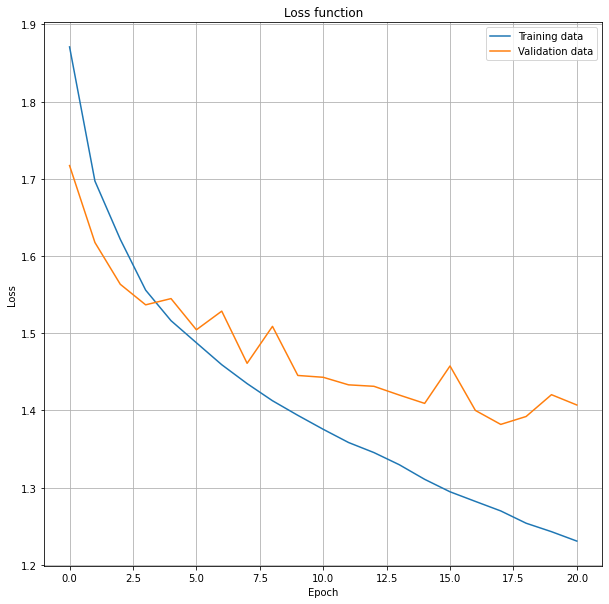

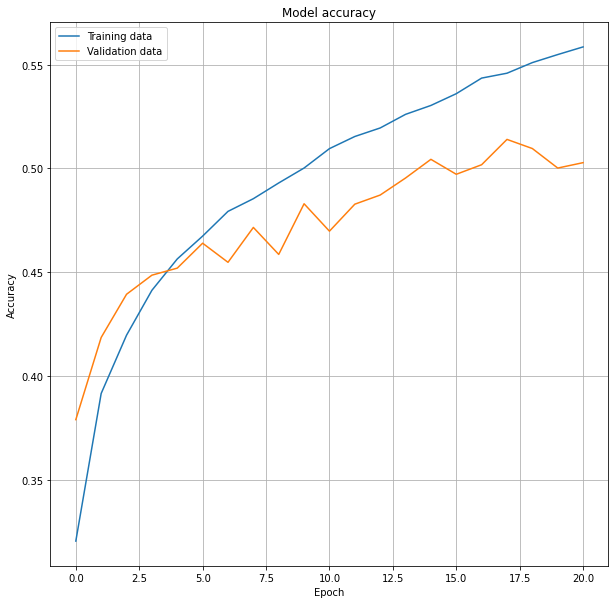

In [122]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [123]:
 model.evaluate(ds_test, verbose=2)



79/79 - 0s - loss: 1.4306 - accuracy: 0.4953


[1.430606484413147, 0.4952999949455261]

In [124]:
model.save('cifar')

INFO:tensorflow:Assets written to: cifar/assets


INFO:tensorflow:Assets written to: cifar/assets


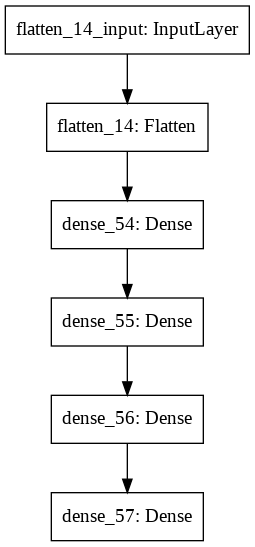

In [125]:
tf.keras.utils.plot_model(model)

## Add more layers with callback

In [126]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy', 'mse'],
)

# Summary of the model
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_59 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_60 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_61 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_62 (Dense)             (None, 10)                1290      
Total params: 444,170
Trainable params: 444,170
Non-trainable params: 0
_______________________________________________

In [127]:
hist = model.fit(
    ds_train,
    epochs=40,
    validation_data=ds_val,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) #Here we are using ds_test as the validation and testing the performance on test dat throuh that. If we use teh validation data, we will calculate the test score on test data seperately.
)

Epoch 1/40
352/352 [==============================] - 5s 12ms/step - loss: 2.0201 - accuracy: 0.2558 - mse: 27.3208 - val_loss: 1.7288 - val_accuracy: 0.3752 - val_mse: 28.8158
Epoch 2/40
352/352 [==============================] - 4s 11ms/step - loss: 1.7177 - accuracy: 0.3816 - mse: 27.5822 - val_loss: 1.6174 - val_accuracy: 0.4166 - val_mse: 28.8212
Epoch 3/40
352/352 [==============================] - 4s 11ms/step - loss: 1.6149 - accuracy: 0.4223 - mse: 27.2368 - val_loss: 1.5798 - val_accuracy: 0.4350 - val_mse: 28.8241
Epoch 4/40
352/352 [==============================] - 4s 12ms/step - loss: 1.5712 - accuracy: 0.4380 - mse: 27.6769 - val_loss: 1.5821 - val_accuracy: 0.4318 - val_mse: 28.8248
Epoch 5/40
352/352 [==============================] - 4s 11ms/step - loss: 1.5164 - accuracy: 0.4606 - mse: 27.4568 - val_loss: 1.5109 - val_accuracy: 0.4620 - val_mse: 28.8251
Epoch 6/40
352/352 [==============================] - 4s 12ms/step - loss: 1.5062 - accuracy: 0.4634 - mse: 27.4020

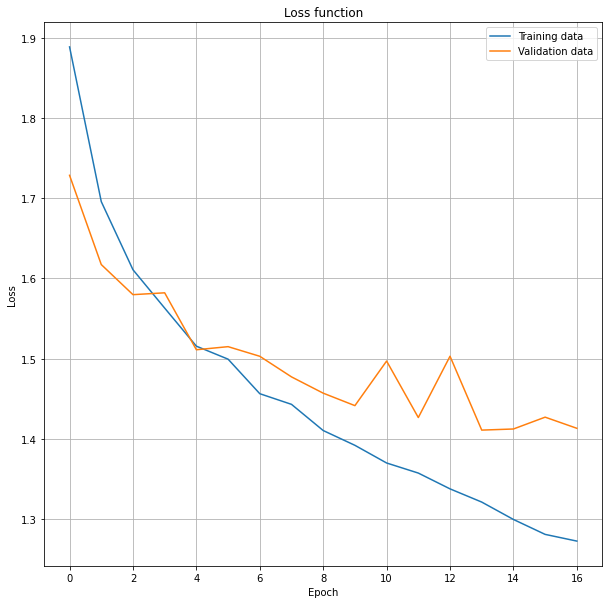

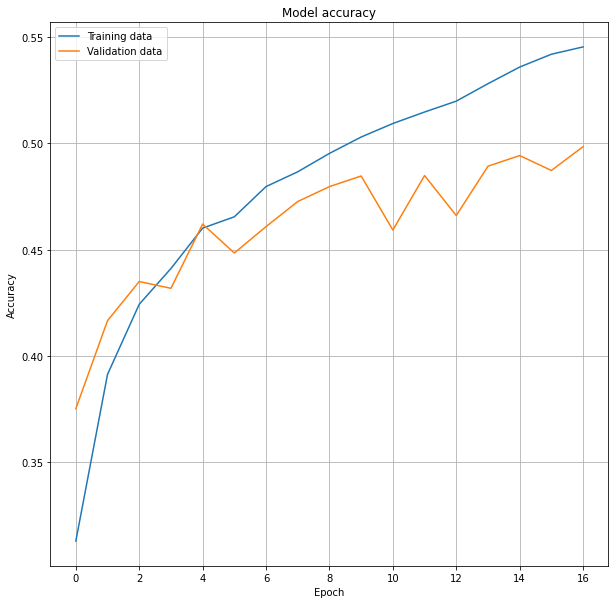

In [128]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [129]:
 model.evaluate(ds_test, verbose=2)

79/79 - 0s - loss: 1.4311 - accuracy: 0.4894 - mse: 27.6405


[1.431072473526001, 0.4893999993801117, 27.640541076660156]

5 hidden layers

In [130]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy', 'mse'],
)

# Summary of the model
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_64 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_65 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_66 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_67 (Dense)             (None, 10)                1290      
Total params: 444,170
Trainable params: 444,170
Non-trainable params: 0
_______________________________________________

In [131]:
hist = model.fit(
    ds_train,
    epochs=40,
    validation_data=ds_val,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) #Here we are using ds_test as the validation and testing the performance on test dat throuh that. If we use teh validation data, we will calculate the test score on test data seperately.
)

Epoch 1/40
352/352 [==============================] - 5s 12ms/step - loss: 2.0257 - accuracy: 0.2507 - mse: 27.5560 - val_loss: 1.7279 - val_accuracy: 0.3836 - val_mse: 28.8184
Epoch 2/40
352/352 [==============================] - 4s 11ms/step - loss: 1.7245 - accuracy: 0.3819 - mse: 27.5607 - val_loss: 1.6671 - val_accuracy: 0.3992 - val_mse: 28.8179
Epoch 3/40
352/352 [==============================] - 4s 11ms/step - loss: 1.6397 - accuracy: 0.4121 - mse: 27.3734 - val_loss: 1.6494 - val_accuracy: 0.4140 - val_mse: 28.8257
Epoch 4/40
352/352 [==============================] - 4s 11ms/step - loss: 1.5559 - accuracy: 0.4429 - mse: 27.7340 - val_loss: 1.5287 - val_accuracy: 0.4468 - val_mse: 28.8240
Epoch 5/40
352/352 [==============================] - 4s 11ms/step - loss: 1.5242 - accuracy: 0.4541 - mse: 27.6719 - val_loss: 1.5371 - val_accuracy: 0.4410 - val_mse: 28.8245
Epoch 6/40
352/352 [==============================] - 4s 11ms/step - loss: 1.4861 - accuracy: 0.4678 - mse: 27.5795

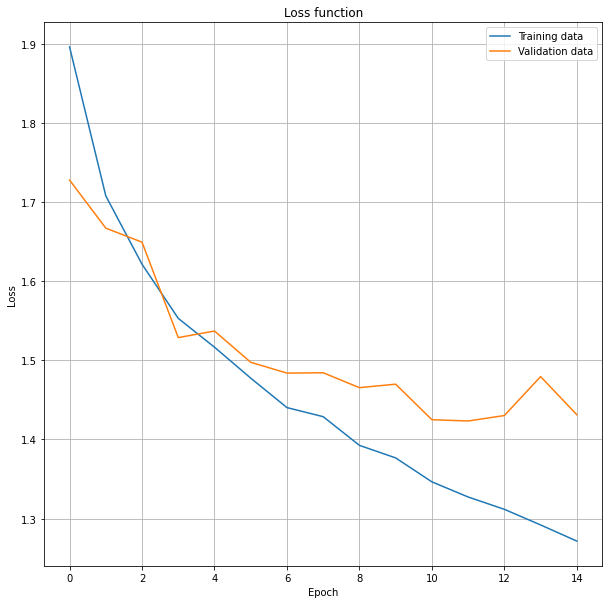

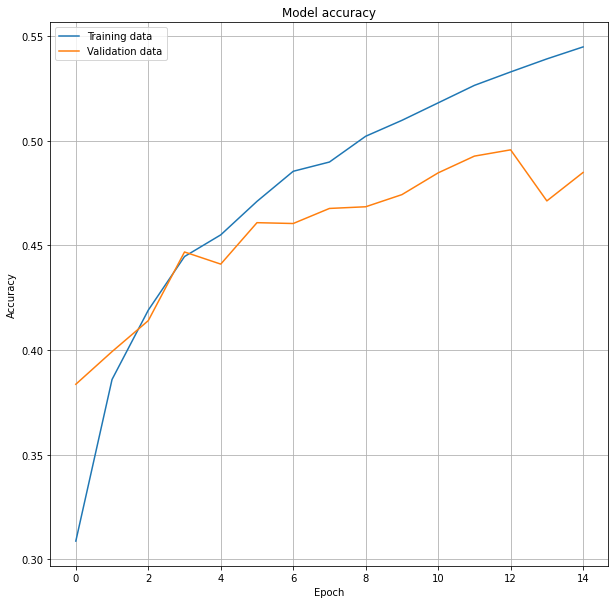

In [132]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [133]:
 model.evaluate(ds_test, verbose=2)

79/79 - 0s - loss: 1.4164 - accuracy: 0.5002 - mse: 27.6411


[1.4164055585861206, 0.5001999735832214, 27.64107894897461]

## Change optimizer hyperparameter

In [134]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.01),
    metrics=['accuracy'],
)

# Summary of the model
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_68 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_69 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_70 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_71 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [135]:
hist = model.fit(
    ds_train,
    epochs=40,
    validation_data=ds_val,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) 
)

Epoch 1/40
352/352 [==============================] - 5s 12ms/step - loss: 2.9095 - accuracy: 0.1956 - val_loss: 1.8872 - val_accuracy: 0.3084
Epoch 2/40
352/352 [==============================] - 4s 11ms/step - loss: 1.9153 - accuracy: 0.2956 - val_loss: 1.8481 - val_accuracy: 0.3336
Epoch 3/40
352/352 [==============================] - 4s 11ms/step - loss: 1.8789 - accuracy: 0.3124 - val_loss: 1.8639 - val_accuracy: 0.3196
Epoch 4/40
352/352 [==============================] - 4s 11ms/step - loss: 1.8660 - accuracy: 0.3164 - val_loss: 1.8620 - val_accuracy: 0.3112
Epoch 5/40
352/352 [==============================] - 4s 11ms/step - loss: 1.8502 - accuracy: 0.3201 - val_loss: 1.8311 - val_accuracy: 0.3248
Epoch 6/40
352/352 [==============================] - 4s 11ms/step - loss: 1.8542 - accuracy: 0.3180 - val_loss: 1.8198 - val_accuracy: 0.3344
Epoch 7/40
352/352 [==============================] - 4s 11ms/step - loss: 1.8399 - accuracy: 0.3196 - val_loss: 1.8466 - val_accuracy: 0.3222

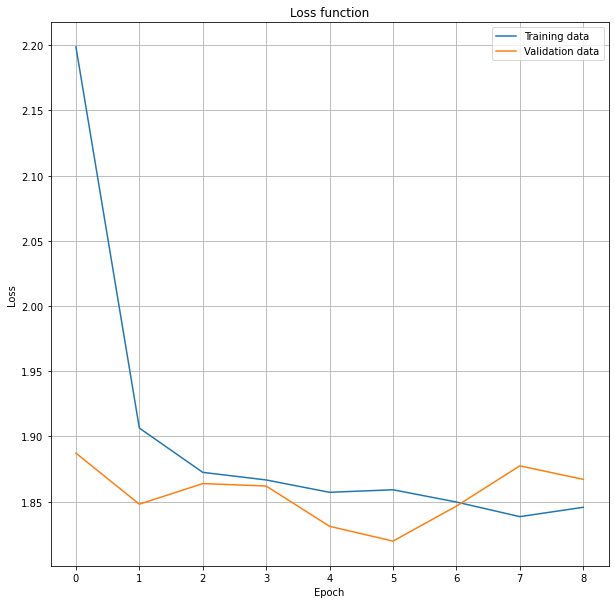

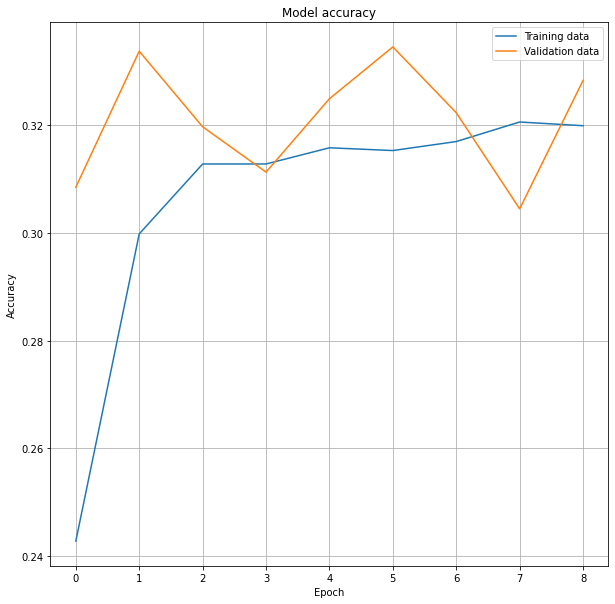

In [136]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [137]:
 model.evaluate(ds_test, verbose=2)

79/79 - 0s - loss: 1.8752 - accuracy: 0.3149


[1.8751945495605469, 0.3149000108242035]

The learning is more erratic with higher optimizer parameter, which is expected.

## Change optimizer

We observe here that SGD train slowly so if itstart from a far away weights it will need more epochs.

In [138]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.SGD(0.001),
    metrics=['accuracy','mse',tf.keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

# Summary of the model
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_18 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_72 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_73 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_74 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_75 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [139]:
hist = model.fit(
    ds_train,
    epochs=150,
    validation_data=ds_val,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=4) 
)

Epoch 1/150
352/352 [==============================] - 4s 11ms/step - loss: 2.3130 - accuracy: 0.1172 - mse: 27.3055 - acc: 0.1172 - val_loss: 2.2496 - val_accuracy: 0.1902 - val_mse: 28.8029 - val_acc: 0.1902
Epoch 2/150
352/352 [==============================] - 4s 11ms/step - loss: 2.2409 - accuracy: 0.1889 - mse: 27.5623 - acc: 0.1889 - val_loss: 2.2009 - val_accuracy: 0.2084 - val_mse: 28.8032 - val_acc: 0.2084
Epoch 3/150
352/352 [==============================] - 4s 11ms/step - loss: 2.1901 - accuracy: 0.2181 - mse: 27.3795 - acc: 0.2181 - val_loss: 2.1494 - val_accuracy: 0.2316 - val_mse: 28.8037 - val_acc: 0.2316
Epoch 4/150
352/352 [==============================] - 4s 11ms/step - loss: 2.1424 - accuracy: 0.2341 - mse: 27.5308 - acc: 0.2341 - val_loss: 2.1016 - val_accuracy: 0.2526 - val_mse: 28.8043 - val_acc: 0.2526
Epoch 5/150
352/352 [==============================] - 4s 11ms/step - loss: 2.0931 - accuracy: 0.2618 - mse: 27.4881 - acc: 0.2618 - val_loss: 2.0604 - val_accu

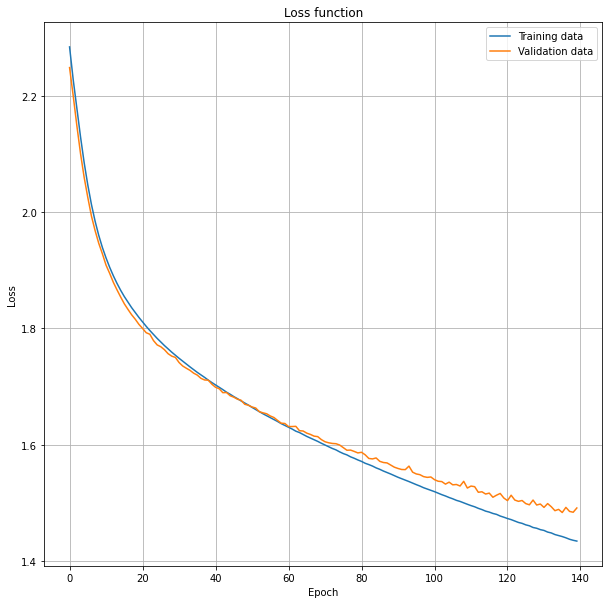

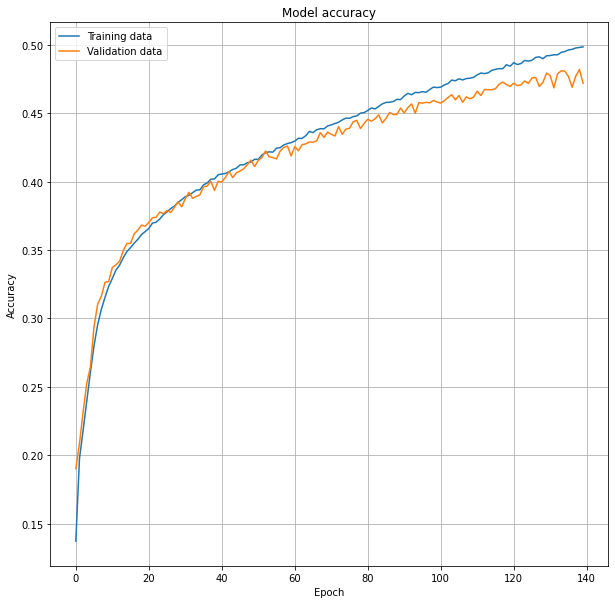

In [140]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

Learning with Stochastic Gradient decent is slower with rate 0.01, which is expected.

In [141]:
 model.evaluate(ds_test, verbose=2)

79/79 - 0s - loss: 1.4893 - accuracy: 0.4705 - mse: 27.6330 - acc: 0.4705


[1.4892852306365967,
 0.47049999237060547,
 27.633033752441406,
 0.47049999237060547]

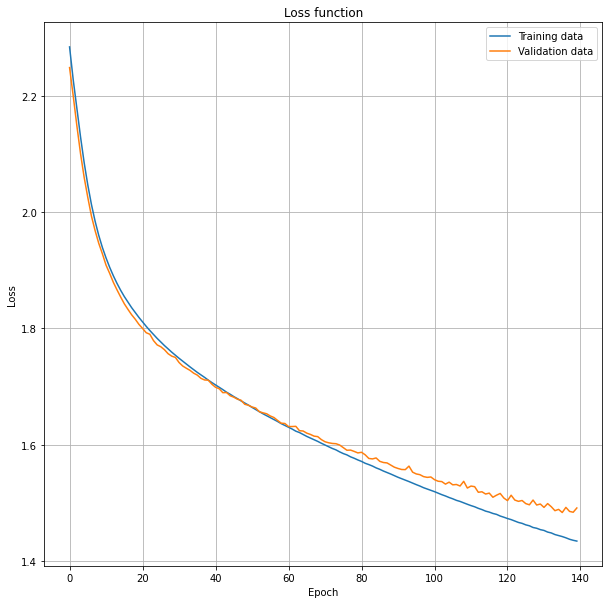

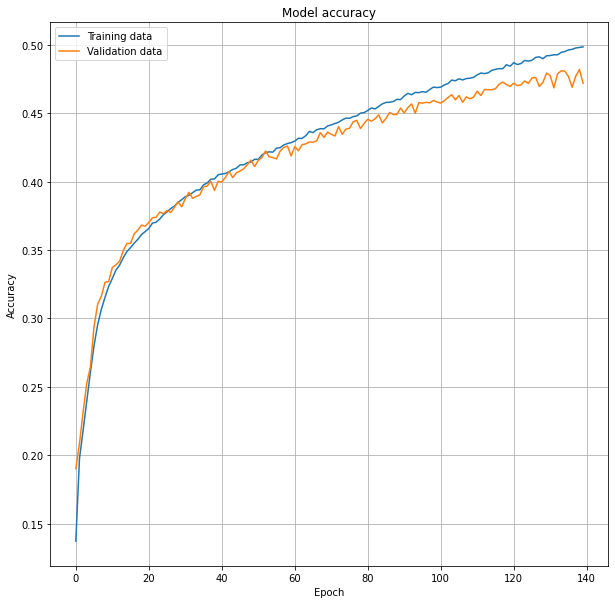

In [142]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

# 2. Numpy arrays

As noted befor, the TD Dataset although great with optimizing performance but are harder to work with post learning to use classical metric reports. We will use arrays for these networks.

In [143]:
(X_train, y_train),(X_test,y_test) = cifar10.load_data()

In [144]:
X_train.shape

(50000, 32, 32, 3)

Normalize and hot encode the data

In [145]:
X_train = (X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)) 
X_test = (X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test))
class_names = np.unique(y_train)
 #one hot encoding of the targets 
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [146]:
y_train.shape #encoded in the vector

(50000, 10)

## Model

In [147]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']#[tf.keras.metrics.Recall(name='recall', top_k=3)]
)

# Summary of the model
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_76 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_79 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


The default batch size is 32

In [148]:
hist = model.fit(
    X_train,y_train,
    epochs=50,
    validation_split=0.2,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) 
)

Epoch 1/50
1250/1250 [==============================] - 8s 6ms/step - loss: 2.0037 - accuracy: 0.2612 - val_loss: 1.8209 - val_accuracy: 0.3527
Epoch 2/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.7345 - accuracy: 0.3714 - val_loss: 1.6861 - val_accuracy: 0.4003
Epoch 3/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.6498 - accuracy: 0.4097 - val_loss: 1.6445 - val_accuracy: 0.4051
Epoch 4/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5889 - accuracy: 0.4280 - val_loss: 1.6286 - val_accuracy: 0.4211
Epoch 5/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5411 - accuracy: 0.4472 - val_loss: 1.6098 - val_accuracy: 0.4258
Epoch 6/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.5035 - accuracy: 0.4578 - val_loss: 1.5893 - val_accuracy: 0.4377
Epoch 7/50
1250/1250 [==============================] - 7s 6ms/step - loss: 1.4871 - accuracy: 0.4667 - val_loss: 1.5645 - val_accuracy:

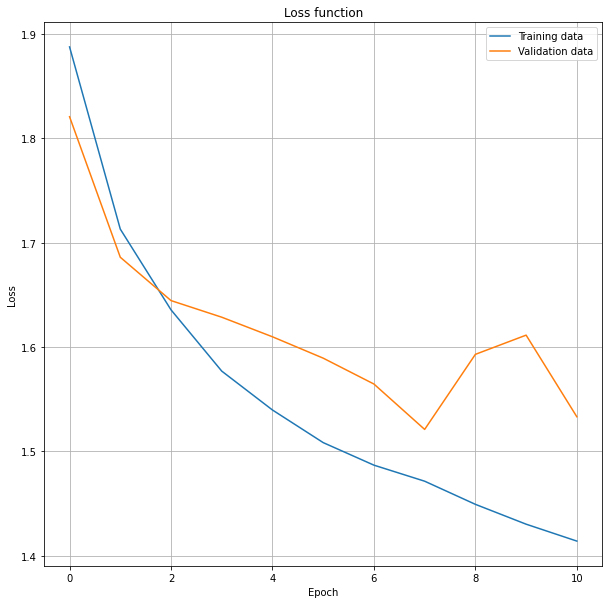

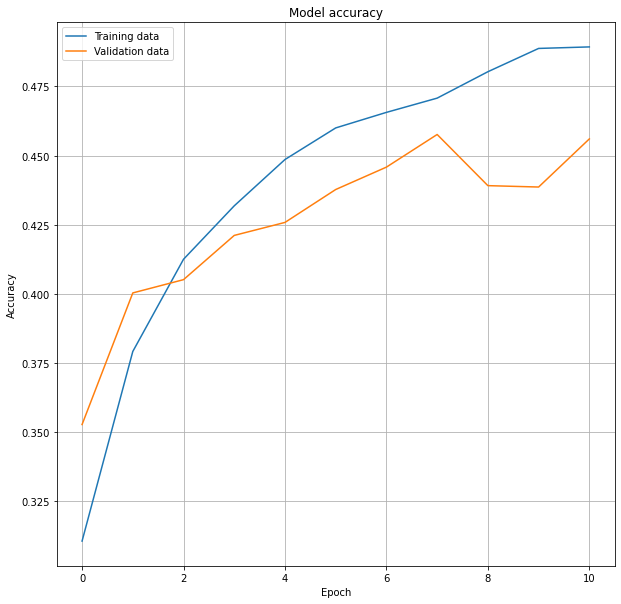

In [149]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

In [150]:
 model.evaluate(X_test,y_test, verbose=2)

313/313 - 1s - loss: 1.5058 - accuracy: 0.4632


[1.5057705640792847, 0.46320000290870667]

In [151]:
y_predict = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [152]:
y_predict

array([5, 8, 8, ..., 3, 6, 7])

In [153]:
np.argmax(model.predict(X_test), axis=-1) #Alternative to the model.predict as that is being deprecated.

array([5, 8, 8, ..., 3, 6, 7])

In [154]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [155]:
y_testLabel = np.argmax(y_test,axis=1) #y_test is hot encoded so we reshape it to match with 

In [156]:
y_testLabel

array([3, 8, 8, ..., 5, 1, 7])

In [157]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification report \n=======================") 
print(classification_report(y_true=y_testLabel, y_pred=y_predict))

Classification report 
              precision    recall  f1-score   support

           0       0.51      0.53      0.52      1000
           1       0.64      0.52      0.58      1000
           2       0.40      0.22      0.29      1000
           3       0.33      0.27      0.30      1000
           4       0.40      0.37      0.39      1000
           5       0.39      0.41      0.40      1000
           6       0.42      0.70      0.52      1000
           7       0.56      0.46      0.50      1000
           8       0.47      0.70      0.56      1000
           9       0.56      0.45      0.50      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000



### Build models with different metrics.

In [158]:
# Step 3: Create the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model, i.e. associate a loss function and the chosen variant of GD
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics = [tf.keras.metrics.Recall(),'accuracy','mse',tf.keras.metrics.Precision()]
)

# Summary of the model
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)               393344    
_________________________________________________________________
dense_81 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_82 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_83 (Dense)             (None, 10)                1290      
Total params: 427,658
Trainable params: 427,658
Non-trainable params: 0
_________________________________________________________________


In [159]:
hist = model.fit( 
    X_train,y_train,
    epochs=50,
    validation_split=0.2,
    callbacks = tf.keras.callbacks.EarlyStopping(patience=3) 
)

Epoch 1/50
1250/1250 [==============================] - 9s 7ms/step - loss: 1.9979 - recall_3: 0.0416 - accuracy: 0.2650 - mse: 0.0828 - precision_3: 0.5439 - val_loss: 1.7466 - val_recall_3: 0.1053 - val_accuracy: 0.3750 - val_mse: 0.0753 - val_precision_3: 0.6417
Epoch 2/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.7203 - recall_3: 0.1251 - accuracy: 0.3797 - mse: 0.0748 - precision_3: 0.6079 - val_loss: 1.6621 - val_recall_3: 0.1628 - val_accuracy: 0.3997 - val_mse: 0.0728 - val_precision_3: 0.6240
Epoch 3/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.6292 - recall_3: 0.1721 - accuracy: 0.4117 - mse: 0.0718 - precision_3: 0.6438 - val_loss: 1.5989 - val_recall_3: 0.1936 - val_accuracy: 0.4257 - val_mse: 0.0705 - val_precision_3: 0.6445
Epoch 4/50
1250/1250 [==============================] - 8s 6ms/step - loss: 1.5816 - recall_3: 0.1963 - accuracy: 0.4300 - mse: 0.0702 - precision_3: 0.6483 - val_loss: 1.6035 - val_recall_3: 0.1937 - v

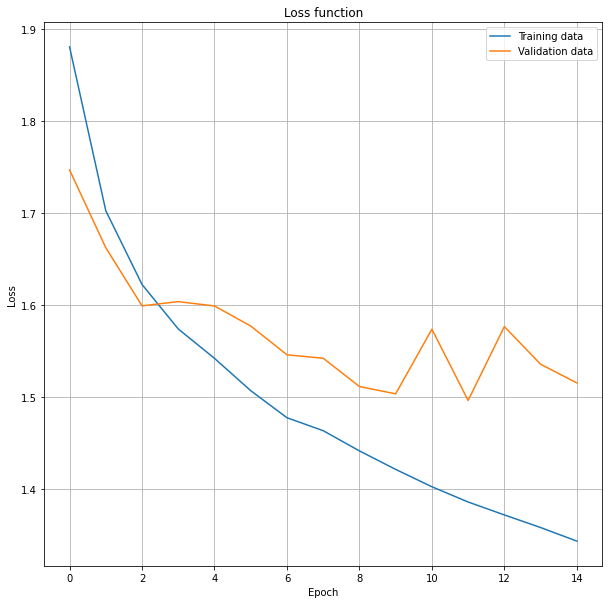

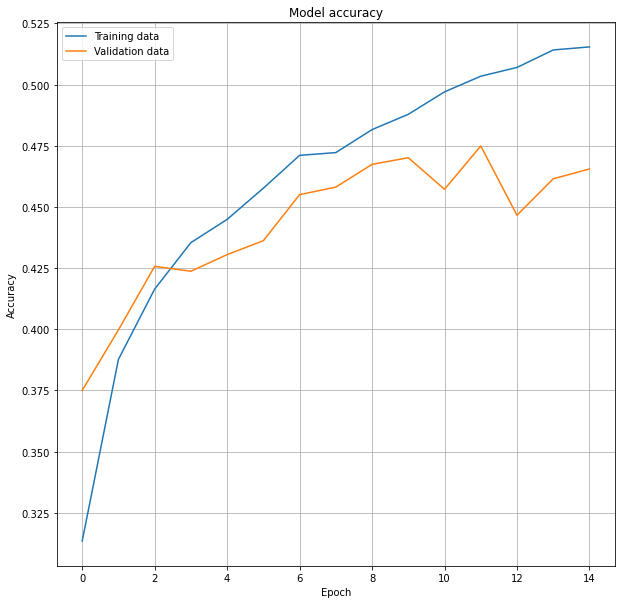

In [160]:
# Plot the training progress
fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss function')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])
plt.show()

fig = plt.figure(figsize=(10,10))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid()
plt.legend(['Training data', 'Validation data'])

accuracy: 0.5482

In [161]:
 model.evaluate(X_test,y_test, verbose=2)

313/313 - 1s - loss: 1.4797 - recall_3: 0.2913 - accuracy: 0.4747 - mse: 0.0661 - precision_3: 0.6501


[1.479674220085144,
 0.2912999987602234,
 0.474700003862381,
 0.06612690538167953,
 0.6500781178474426]

accuracy: 0.4707

In [162]:
y_predict = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [163]:
from sklearn.metrics import classification_report,confusion_matrix 
print("Classification report \n=======================") 
print(classification_report(y_true=y_testLabel, y_pred=y_predict))

Classification report 
              precision    recall  f1-score   support

           0       0.51      0.59      0.54      1000
           1       0.62      0.47      0.54      1000
           2       0.35      0.38      0.36      1000
           3       0.37      0.23      0.28      1000
           4       0.39      0.45      0.42      1000
           5       0.42      0.33      0.37      1000
           6       0.45      0.61      0.52      1000
           7       0.53      0.56      0.54      1000
           8       0.63      0.52      0.57      1000
           9       0.51      0.60      0.55      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.47      0.47     10000
weighted avg       0.48      0.47      0.47     10000



# Conclusion

1. The basic neural network is not as good for the image classification but it demostrate the power of these networks over classic linear algorithms.
2. Adding more layers increase the train accuracy significantly but not the validation and test accuracy.
3. Adding more layers with a callback to stop when diverging from validation accuracy is a better appraoch.
4. TF Datasets are great to easily do performance optimization. It is easy to cache data and process them when big to download the data.
5. It is a bit difficult to work with afterwards as train and test data it is in prefetch dataset type at the end of pipeline.
6. Numpy arrays are good with smaller datasets and many modules of classical fnctions can be used.
7. These network can be seen to be doing well in certain classes better than other. Another thing to note is that as it is learning the precision is significantly better than recall. 
